In [2]:
# Import necessary libraries
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Set player-specific information
player = 'Jude-Bellingham'
player_id = '57d88cf9'

# Define seasons of interest
seasons = ['2020-2021', '2021-2022', '2022-2023', '2023-2024']

# List to store DataFrames for each season
merged_dfs = []

In [7]:
# Loop through each season
for season in seasons:
    # Construct the URL for the player's match logs on FBref
    url = "https://fbref.com/en/players/"+player_id+"/matchlogs/"+season+"/"+player+"-Match-Logs"
    
    # Retrieve and process data for the player
    df = pd.read_html(url, index_col=[0,1])[0]
    df.columns = df.columns.droplevel(0)
    df = df.iloc[:-1]
    df = df.to_csv("tempforplayer.csv")
    time.sleep(3)
    df = pd.read_csv("tempforplayer.csv")
    df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Day'}, inplace=True)

    
    merged_dfs.append(df)
    df['Season'] = season
# Concatenate all DataFrames for different seasons into a single DataFrame
df = pd.concat(merged_dfs, ignore_index=True)
df

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,...,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att.1,Succ,Match Report,Season
0,2020-09-14,Mon,DFB-Pokal,First round,Away,W 5–0,Dortmund,MSV Duisburg,Y,DM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,2020-2021
1,2020-09-19,Sat,Bundesliga,Matchweek 1,Home,W 3–0,Dortmund,M'Gladbach,Y,CM,...,35,42,83.3,1,23,1,3,1,Match Report,2020-2021
2,2020-09-26,Sat,Bundesliga,Matchweek 2,Away,L 0–2,Dortmund,Augsburg,Y,CM,...,43,52,82.7,6,37,1,2,2,Match Report,2020-2021
3,2020-09-30,Wed,DFL-Supercup,DFL-Supercup,Away,L 2–3,Dortmund,Bayern Munich,N,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,2020-2021
4,2020-10-03,Sat,Bundesliga,Matchweek 3,Home,W 4–0,Dortmund,Freiburg,Y,CM,...,49,56,87.5,3,44,2,4,3,Match Report,2020-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2023-11-08,Wed,Champions Lg,Group stage,Home,W 3–0,es Real Madrid,pt Braga,N,"On matchday squad, but did not play",...,"On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play",Match Report,2023-2024
406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-2024
407,2023-11-26,Sun,La Liga,Matchweek 14,Away,W 3–0,Real Madrid,Cádiz,Y,AM,...,60,64,93.8,8,58,7,5,3,Match Report,2023-2024
408,2023-11-29,Wed,Champions Lg,Group stage,Home,W 4–2,es Real Madrid,it Napoli,Y,"AM,FW",...,64,74,86.5,11,61,8,6,3,Match Report,2023-2024


In [8]:
df=df.sort_values(by='Date')
df['Min'] = pd.to_numeric(df['Min'], errors='coerce')
df = df.dropna(subset=['Min'])
df = df[df['xG'].notna()]
squad_values = ['Real Madrid', 'es Real Madrid', 'Alavés', 'Espanyol', 'Dortmund', 'de Dortmund']
df = df[df['Squad'].isin(squad_values)]
df= df.drop_duplicates(subset=['Date'])
df= df.reset_index(drop=True)
df['Match'] = df.index + 1
df

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,...,Att,Cmp%,PrgP,Carries,PrgC,Att.1,Succ,Match Report,Season,Match
0,2020-09-19,Sat,Bundesliga,Matchweek 1,Home,W 3–0,Dortmund,M'Gladbach,Y,CM,...,42,83.3,1,23,1,3,1,Match Report,2020-2021,1
1,2020-09-26,Sat,Bundesliga,Matchweek 2,Away,L 0–2,Dortmund,Augsburg,Y,CM,...,52,82.7,6,37,1,2,2,Match Report,2020-2021,2
2,2020-10-03,Sat,Bundesliga,Matchweek 3,Home,W 4–0,Dortmund,Freiburg,Y,CM,...,56,87.5,3,44,2,4,3,Match Report,2020-2021,3
3,2020-10-17,Sat,Bundesliga,Matchweek 4,Away,W 1–0,Dortmund,Hoffenheim,N,CM,...,7,71.4,1,2,0,1,0,Match Report,2020-2021,4
4,2020-10-20,Tue,Champions Lg,Group stage,Away,L 1–3,de Dortmund,it Lazio,Y,CM,...,32,90.6,5,21,0,0,0,Match Report,2020-2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2023-10-28,Sat,La Liga,Matchweek 11,Away,W 2–1,Real Madrid,Barcelona,Y,CM,...,48,91.7,4,44,0,4,0,Match Report,2023-2024,130
130,2023-11-05,Sun,La Liga,Matchweek 12,Home,D 0–0,Real Madrid,Rayo Vallecano,Y,AM,...,66,89.4,10,51,7,5,3,Match Report,2023-2024,131
131,2023-11-26,Sun,La Liga,Matchweek 14,Away,W 3–0,Real Madrid,Cádiz,Y,AM,...,64,93.8,8,58,7,5,3,Match Report,2023-2024,132
132,2023-11-29,Wed,Champions Lg,Group stage,Home,W 4–2,es Real Madrid,it Napoli,Y,"AM,FW",...,74,86.5,11,61,8,6,3,Match Report,2023-2024,133


In [14]:
first_var = 'Rolling_npxG'
second_var = 'Rolling_Gls'

# Calculate rolling averages for expected goals (var1) for and against the player
df['first_var'] = df['npxG'].rolling(window=10).mean()
df['second_var'] = df['Gls'].rolling(window=10).mean()

# Sort the DataFrame by 'Season' and 'Match'
df = df.sort_values(by=['Season', 'Match'])

# Create a list of unique seasons
unique_seasons = df['Season'].unique()

# Create a list of tick positions based on the changes in the 'Season' column
tick_positions = [df[df['Season'] == season]['Match'].iloc[0] for season in unique_seasons]

# Round values in the DataFrame to two decimal places
df = df.round(2)
df

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,...,PrgC,Att.1,Succ,Match Report,Season,Match,Rolling_npxG,Rolling_Gls,first_var,second_var
0,2020-09-19,Sat,Bundesliga,Matchweek 1,Home,W 3–0,Dortmund,M'Gladbach,Y,CM,...,1,3,1,Match Report,2020-2021,1,NaN,NaN,NaN,NaN
1,2020-09-26,Sat,Bundesliga,Matchweek 2,Away,L 0–2,Dortmund,Augsburg,Y,CM,...,1,2,2,Match Report,2020-2021,2,NaN,NaN,NaN,NaN
2,2020-10-03,Sat,Bundesliga,Matchweek 3,Home,W 4–0,Dortmund,Freiburg,Y,CM,...,2,4,3,Match Report,2020-2021,3,NaN,NaN,NaN,NaN
3,2020-10-17,Sat,Bundesliga,Matchweek 4,Away,W 1–0,Dortmund,Hoffenheim,N,CM,...,0,1,0,Match Report,2020-2021,4,NaN,NaN,NaN,NaN
4,2020-10-20,Tue,Champions Lg,Group stage,Away,L 1–3,de Dortmund,it Lazio,Y,CM,...,0,0,0,Match Report,2020-2021,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2023-10-28,Sat,La Liga,Matchweek 11,Away,W 2–1,Real Madrid,Barcelona,Y,CM,...,0,4,0,Match Report,2023-2024,130,0.54,0.9,0.54,0.9
130,2023-11-05,Sun,La Liga,Matchweek 12,Home,D 0–0,Real Madrid,Rayo Vallecano,Y,AM,...,7,5,3,Match Report,2023-2024,131,0.48,0.8,0.48,0.8
131,2023-11-26,Sun,La Liga,Matchweek 14,Away,W 3–0,Real Madrid,Cádiz,Y,AM,...,7,5,3,Match Report,2023-2024,132,0.50,0.9,0.50,0.9
132,2023-11-29,Wed,Champions Lg,Group stage,Home,W 4–2,es Real Madrid,it Napoli,Y,"AM,FW",...,8,6,3,Match Report,2023-2024,133,0.43,0.9,0.43,0.9


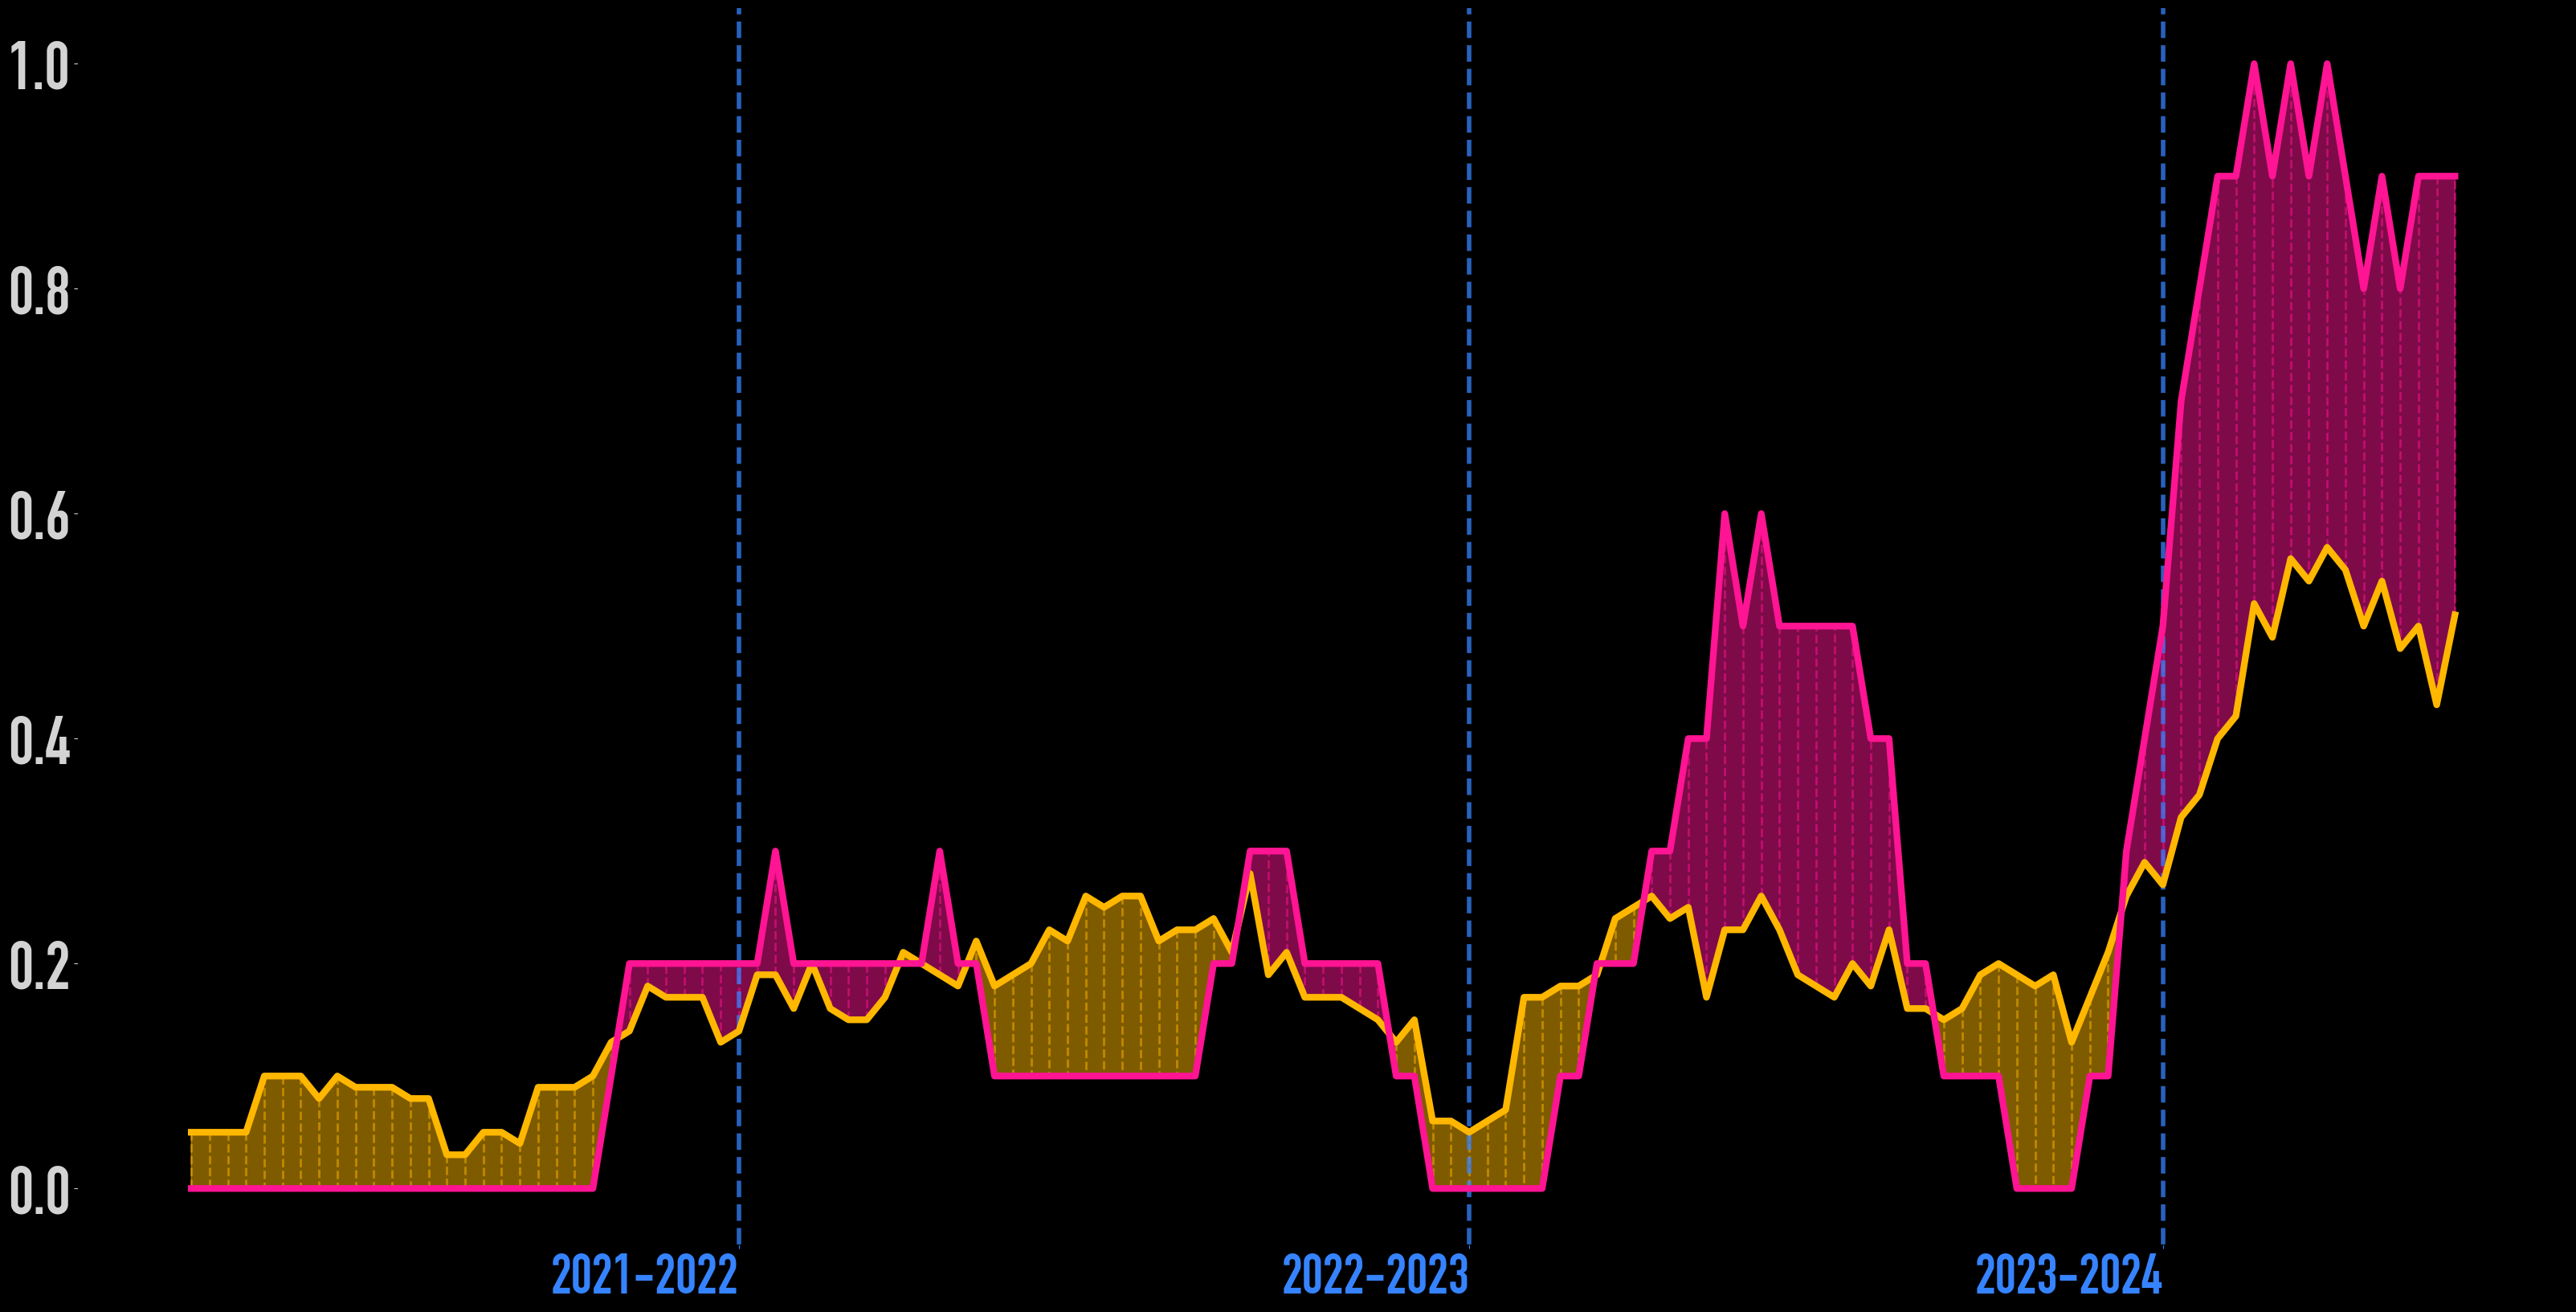

In [15]:
# Define colors for plotting
season_divider_clr = '#3683ff'
clr1 = '#ffb700'
clr2 = 'deeppink'
#connector_clr = 'w'


# Create a large black background figure for the plot
fig = plt.figure(figsize=(40, 20), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")

# Add grid lines for seasons with a specific color
ax.xaxis.grid(color=season_divider_clr, linestyle='--', linewidth=4, alpha=.75, zorder=1, label = 'Season Change')

# Set the x-axis ticks at the specified positions
plt.xticks(tick_positions, unique_seasons, ha='right', fontsize=50, color='lightgrey')

ax.tick_params(axis='x', colors=season_divider_clr)
ax.tick_params(axis='y', colors='lightgrey')

# Customize matplotlib parameters for better visualization
plt.rcParams['axes.labelcolor'] = 'w'
plt.rcParams['font.size'] = 60
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams['lines.linewidth'] = '6'
plt.rcParams['font.family'] = 'DIN Condensed'

# Plot the rolling averages for var1 and var1A
plt.plot(df.Match, df.Rolling_npxG, color=clr1)
plt.plot(df.Match, df.Rolling_Gls, color=clr2)

## Plot connecting lines between var1 and var2 for each match
for index, row in df.iterrows():
    match = row['Match']
    var1 = row['first_var']
    var2 = row['second_var']

    if var1 > var2:
        plt.plot([match, match], [var1, var2], color=clr1, linestyle='--', linewidth=2, alpha=.5, zorder=1)
    elif var2 > var1:
        plt.plot([match, match], [var1, var2], color=clr2, linestyle='--', linewidth=2, alpha=.5, zorder=1)
        
        
# Fill the area between xG and xGA
plt.fill_between(df.Match, df.first_var, df.second_var, where=df.first_var > df.second_var, interpolate=True, color=clr1, alpha=0.5)
plt.fill_between(df.Match, df.first_var, df.second_var, where=df.second_var > df.first_var, interpolate=True, color=clr2, alpha=0.5)
# Customize the legend
#plt.legend(['var1', 'var1A'], loc='upper center', fontsize='large', facecolor='w', edgecolor='white', framealpha=0.8)

# Save the plot as an image file
plt.savefig(player + '-Rollingvar1.png', bbox_inches='tight')